<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

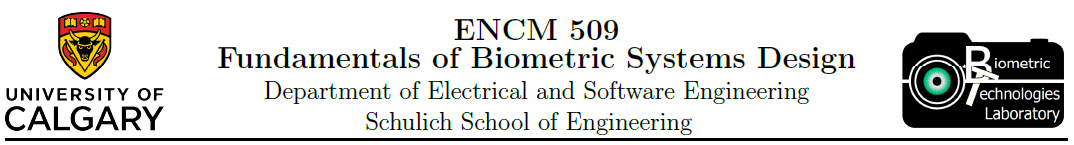

<center>
    <h1>Laboratory Experiment #3</h1>
    <h2>Biometric-based verification: Signature</h2>
</center>

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

<b>Introduction</b>



The purpose of this lab is to gain a deeper understanding on how we can use the Gaussian Mixture Model (GMM) to further analyze and understand the signature data collected during lab 2. In order to do this, we will first focus on training our GMM model using extracted signature data. Then, we will proceed with using the remaining signatures to infer the log likelihood scores, based on our trained model. With this data, we may proceed with plotting a normal distribution, as seen above. The data from these plots and analysis will allow us to perform statistical analysis of our data. For instance, we will calculate the false acceptance rate, false rejection rate and log likelihood score of our distributions.

From completing this lab, we will gain a deeper knowledge of how the Gaussian Mixture Model works. This is important to us as students, since GMM is a widely-used Machine Learning model commonly seen in biometrics. Moreover, by plotting the normal distributions and calculating the FAR and FRR manually, we will be able to obtain a deeper understanding of our signature data when compared to our findings from lab 2, where we did not use any models to analyze our data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [2]:
def Gausian_mixture_plot (training_patterns, training_components, auth_lst, imp_lst):

    # to store all the scores calculated
    aScores = []

    # number of signature samples to use for training the models
    NUMTRAININGPATTERNS = training_patterns
    # number of Gaussian mixture components in the GMM
    NUMGCOMPONENTS = training_components
    total_signatures = 30
    numForgedSigs = 30

    train_set = np.reshape(auth_lst[0], (-1,4))

    # this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
    # this matrix, stored in the varaible "train_set" will be used for the training
    for i in range(1,NUMTRAININGPATTERNS):
        # taking from authentic/genuine
        sample = np.reshape(auth_lst[i], (-1,4))
        train_set = np.concatenate((train_set, sample), axis=0)

    gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

    # to store all the scores calculated
    aScores = []
    
    # going through the remaining signatures after removing the first 20 for training
    for i in range(NUMTRAININGPATTERNS, total_signatures):
        # taking from authentic/genuine
        sample =  np.reshape(auth_lst[i], (-1,4))
        # compute the per-sample average log-likelihood of the given data.
        score = gmm.score(sample)
        #print('%d: %.4f' % (i, score))
        # add the score calculated to the list aScores
        aScores.append(score)


    fScores = []
    for i in range(numForgedSigs):
        # taking from the impostor
        sample =  np.reshape(imp_lst[i], (-1,4))
        score = gmm.score(sample)
        #print('%d: %.4f' % (i, score))
        fScores.append(score)

    # authentic set
    aMu = np.mean(aScores)
    aStd = np.std(aScores)
    
    
    # impostor set
    fMu = np.mean(fScores)
    fStd = np.std(fScores)
    
    print('Average of authentic scores: %.4f' % (aMu))
    print('Std of authentic scores: %.4f' % (aStd))
    print('Average of forgery scores: %.4f' % (fMu))
    print('Std of forgery scores: %.4f' % (fStd))
    
    
    # change this range for your set
    x = np.arange(-60, 0, 0.01)
    
    aProb = norm.pdf(x, loc=aMu, scale=aStd)
    fProb = norm.pdf(x, loc=fMu, scale=fStd)
    
    plt.figure(figsize=(20,4))
    
    
    plt.subplot(1,3,1)
    plt.plot(x, aProb, 'g')
    plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
    plt.plot(x, fProb, 'r')
    plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
    plt.legend()
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));
    
    # Authentic set
    x = np.arange(-40, -10, 0.01)
    aProb = norm.pdf(x, loc=aMu, scale=aStd)
    
    plt.subplot(1,3,2)
    plt.plot(x, aProb, 'g')
    plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
    plt.legend()
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));
       
    # Forged (impostor) set
    x = np.arange(-200, 50, 0.01)
    fProb = norm.pdf(x, loc=fMu, scale=fStd)
    
    plt.subplot(1,3,3)
    plt.plot(x, fProb, 'r')
    plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
    plt.legend()
    plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS, NUMGCOMPONENTS));
    

- **Exercise 1** (4 marks): Create  your own data (three sets of signatures recorded as `.csv` files), or the data provided on D2L. Use the sample Notebook file `Lab3-SigVerif GMM.ipynb`  to classify set 1 (genuine) and set 2 (impostor). Follow the instructions described in  Section 2.2 and repeat this process for 2 different set of parameters (the number of signatures used for training, and the number of Gaussian mixture components, for example 20, 30, 40, ...), total 4 different pairs. In your report, include the illustrations of the distributions for these 4 sets of parameters. Include the 4 sets of distribution plots (figures) for your report. Include a brief analysis of how varying the above parameters influence  the classification results.
		
	 Plot the matching scores' PDFs of the *authentic* (genuine) and *forged* (impostor) sets. Find  the mean ($\mu$) and standard deviation ($\sigma$) for the genuine and impostor scores (variables `aMu`, `fMu`, and `aStd`, `fStd`, respectively). Use two other different sets of parameters, see the difference of plotting the pair of curves (authentic and impostor) together and separately. 

In [3]:
base_dir = './signatures/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'genuine/'
dir_impostor = base_dir + 'impostor/'

# amount of signatures to be loaded
total_signatures = 30

# lists to store the loaded signatures
auth_lst = []
imp_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    imp_lst.append(csv_imp.values)

Average of authentic scores: -18.9091
Std of authentic scores: 0.7196
Average of forgery scores: -25.3464
Std of forgery scores: 4.4717


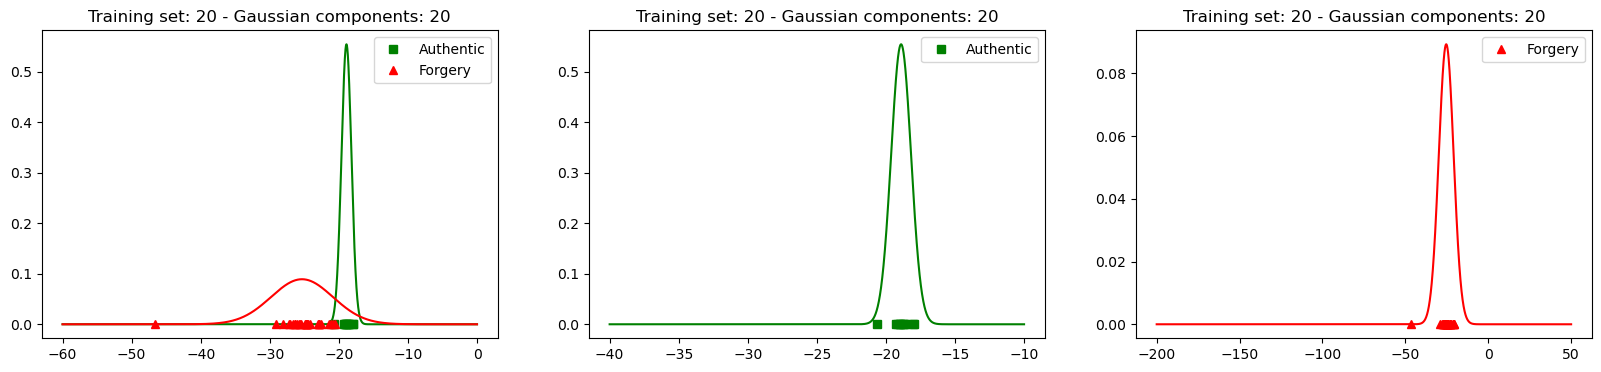

In [4]:
Gausian_mixture_plot (20, 20, auth_lst, imp_lst)

Average of authentic scores: -18.8512
Std of authentic scores: 0.7730
Average of forgery scores: -26.2935
Std of forgery scores: 4.8186


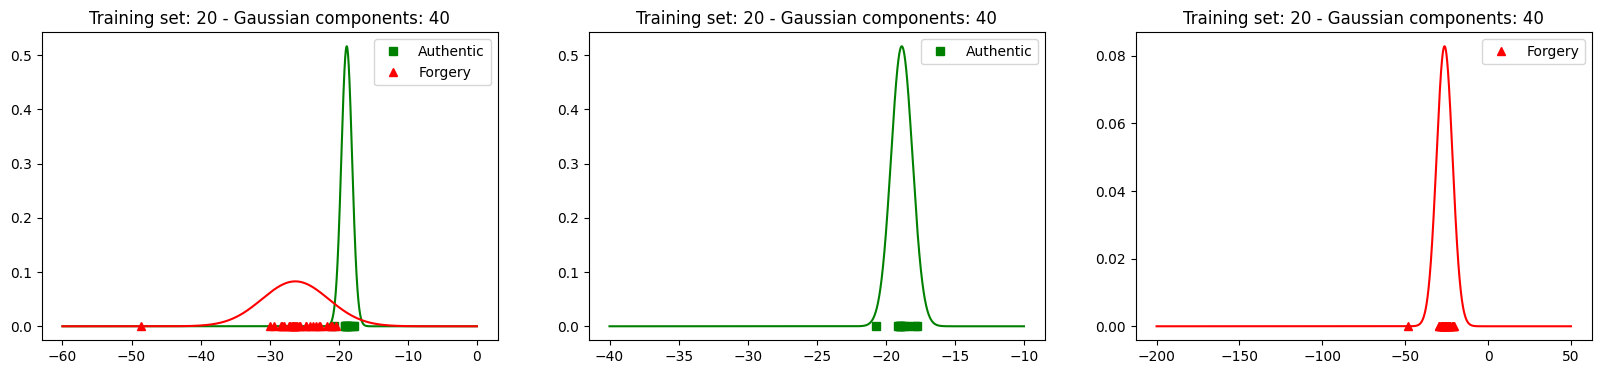

In [94]:
Gausian_mixture_plot (20, 40, auth_lst, imp_lst)

Average of authentic scores: -21.6689
Std of authentic scores: 5.2273
Average of forgery scores: -33.4776
Std of forgery scores: 6.8288


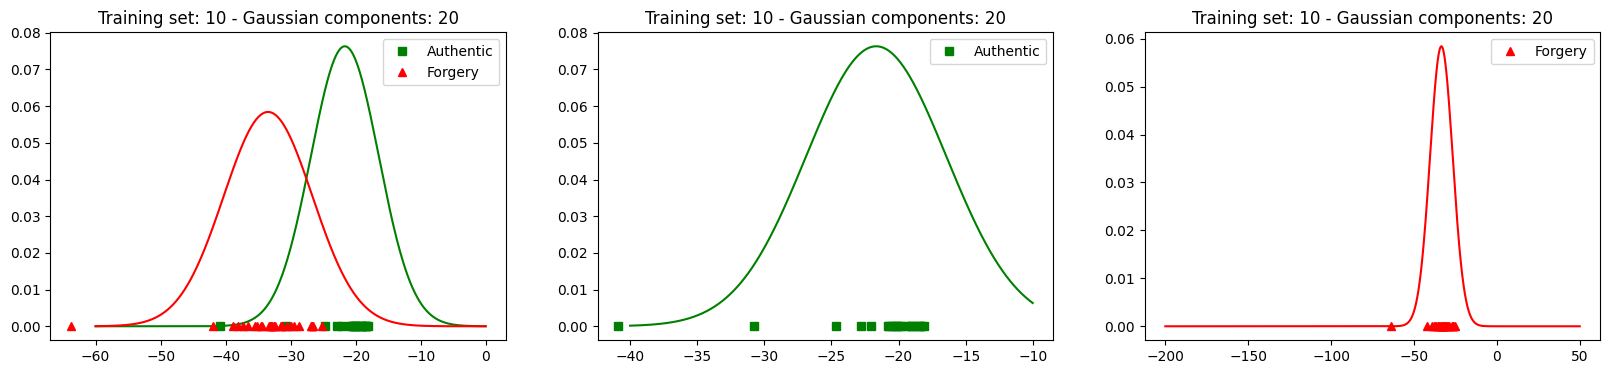

In [95]:
Gausian_mixture_plot (10, 20, auth_lst, imp_lst)

Average of authentic scores: -21.8691
Std of authentic scores: 5.6040
Average of forgery scores: -37.6440
Std of forgery scores: 23.7990


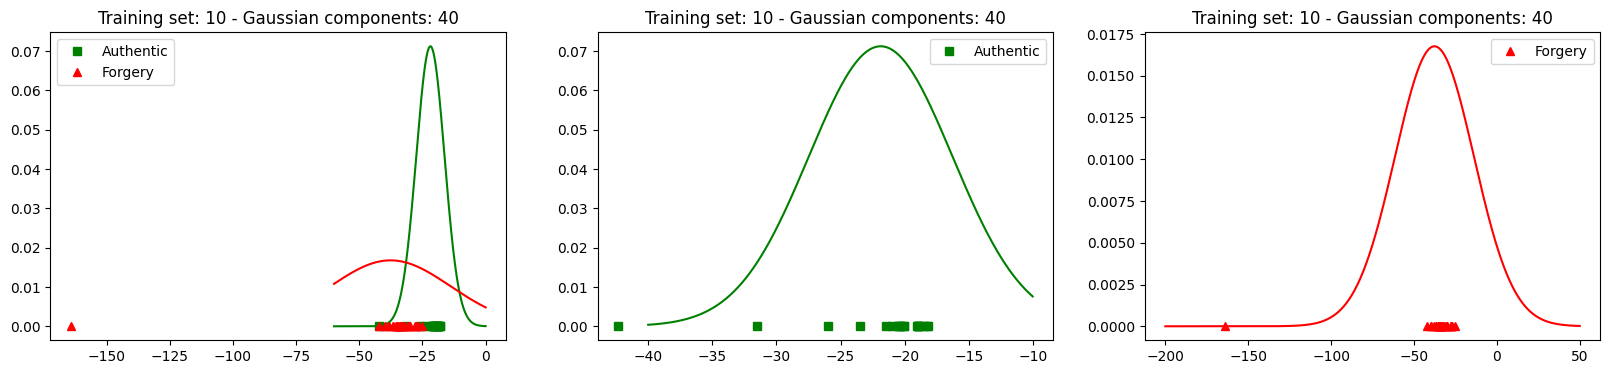

In [96]:
Gausian_mixture_plot (10, 40, auth_lst, imp_lst)

### Analysis
- The different pairs chosen for the number of signatures used for training, and the number of Gaussian mixture components are:
    - (20, 20), (20, 40), (10, 20), (10, 40)
- Each set of plots shows (from left to right) the comparison of the distribution of the authentic and forgery signatures, The distribution of the authentic signatures, the distribution of the forgery signatures
- One of the data points in the imposter data acquisition is a outlier which is visible in some of the plots as a point in the far left

- By keeping the number of gaussian components static and increasing the number of the signatures used to train the model, we can see that the standard deviation of both plots decreases, which implies that the more you train the model the better it gets. However, this increase in the accuracy of the model starts to plateau at some point. Therefore,  the increase in training set after that point has a less of an effect.

- By keeping the number of the signatures used to train the model the same and increasing the number of gaussian components we can see that the standard deviation of both plots increases. This increase is not consistent, however the general trend is. This causes the distribution plots to become more flat and reduces the "goodness" of the model.

- **Exercise 2** (4 marks): Consider the genuine set and the second set of impostor signatures that are very different (in shape, length, i.e. a different writing or another person signature). 
	Repeat the process as described  in Exercise 1,  for 2 different set of parameters (the number of signatures used for training, and the number of Gaussian mixture components, for example 20, 30, 40, ...), total 4 different pairs. In your report, include the illustrations of the distributions for these 4 sets of parameters. 
	Plot the matching scores' PDFs of the *authentic*  (genuine) and *impostor* sets. Find  the mean ($\mu$) and standard deviation ($\sigma$) for the genuine and impostor scores (variables `aMu`, `fMu`, and `aStd`, `fStd`, respectively). Compare these results against the results of Exercise 1.

In [157]:
base_dir = './signatures/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'genuine/'
dir_different = base_dir + 'different/'

# amount of signatures to be loaded
total_signatures = 30

# lists to store the loaded signatures
auth_lst = []
diff_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_diff = pd.read_csv(dir_different + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values)
    diff_lst.append(csv_diff.values)

Average of authentic scores: -18.9148
Std of authentic scores: 0.7279
Average of forgery scores: -21.3673
Std of forgery scores: 0.6362


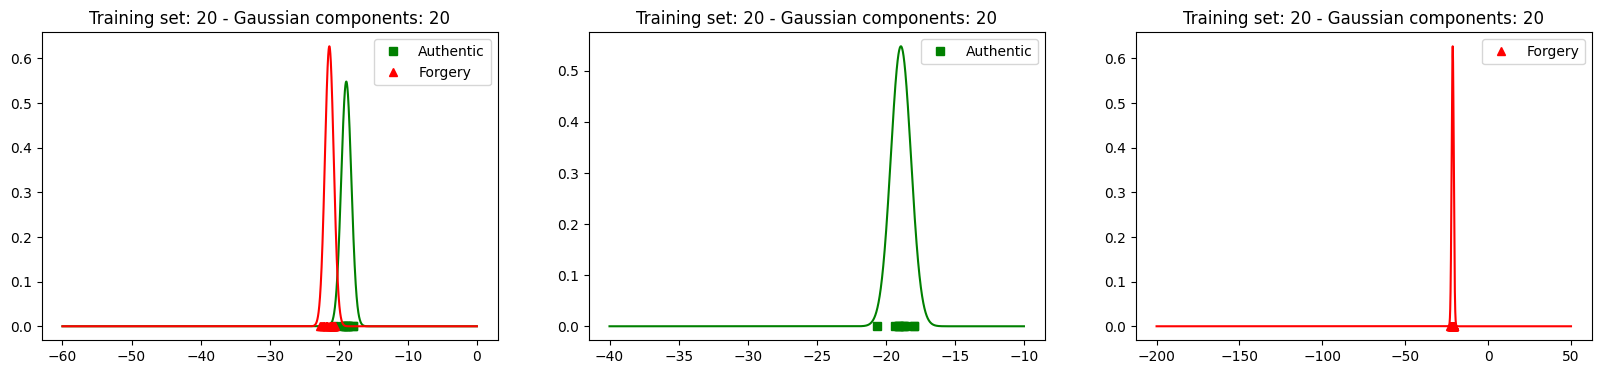

In [158]:
Gausian_mixture_plot (20, 20, auth_lst, diff_lst)

Average of authentic scores: -18.8655
Std of authentic scores: 0.8180
Average of forgery scores: -21.9593
Std of forgery scores: 1.1169


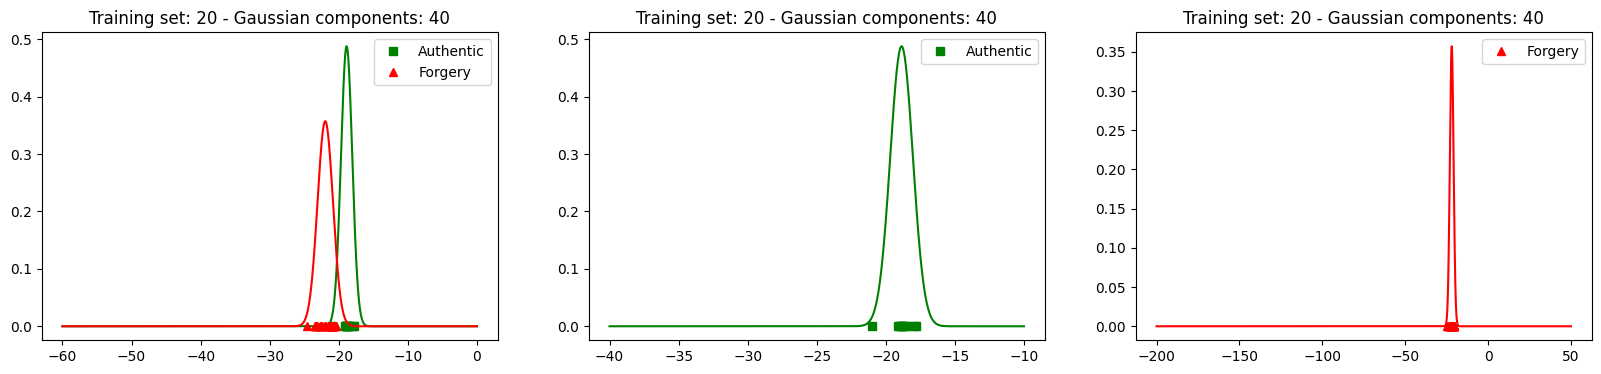

In [159]:
Gausian_mixture_plot (20, 40, auth_lst, diff_lst)

Average of authentic scores: -21.7562
Std of authentic scores: 5.5867
Average of forgery scores: -23.9036
Std of forgery scores: 2.9040


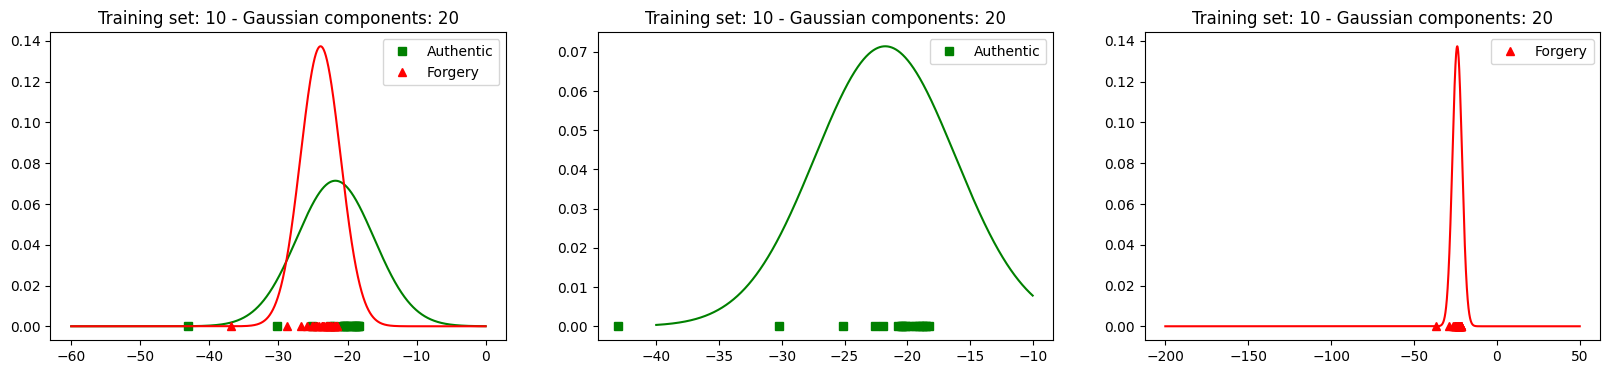

In [160]:
Gausian_mixture_plot (10, 20, auth_lst, diff_lst)

Average of authentic scores: -23.2591
Std of authentic scores: 8.8491
Average of forgery scores: -26.4331
Std of forgery scores: 3.6292


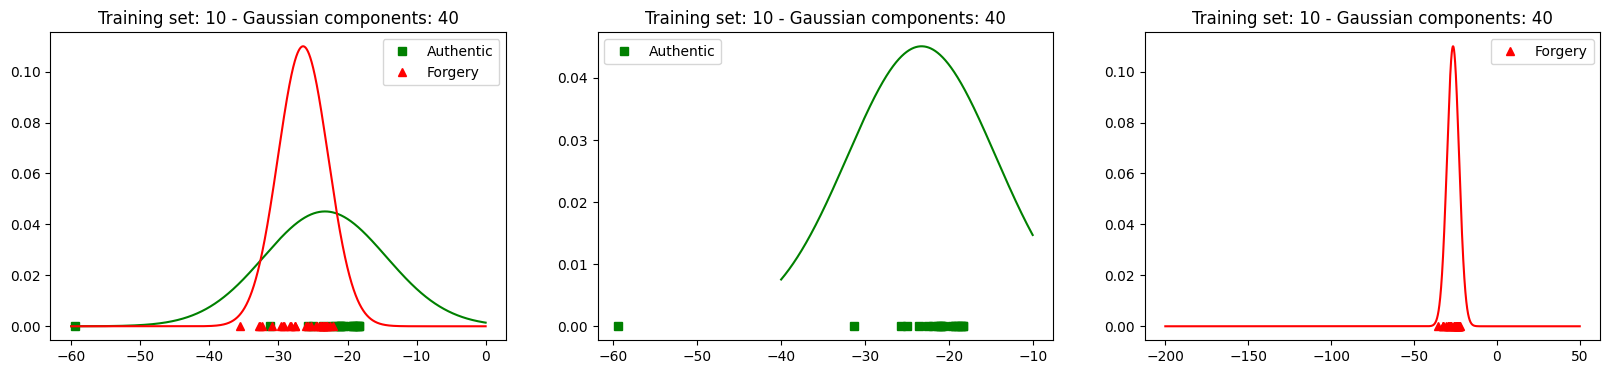

In [161]:
Gausian_mixture_plot (10, 40, auth_lst, diff_lst)

### Analysis
- The different pairs chosen for the number of signatures used for training, and the number of Gaussian mixture components are:
    - (20, 20), (20, 40), (10, 20), (10, 40)
- Each set of plots shows (from left to right) the comparison of the distribution of the authentic and forgery signatures, The distribution of the authentic signatures, the distribution of the forgery signatures

- By comparing the results of this exercise with the previous exercise we can see that with a relatively high number of signatures for training the authentic and "different" signatures have a low standard deviation in their distribution scores. Moreover, we can see that the authentic and "different" have a smaller area where they overlap. This means that when the model is trained enough the diffrent and authentic signatures are easier to classify.

- By looking at the distributions of the signatures where the training set is only 10 signatures. Although the authentic and "different" signatures are very different they have a lot of area of overlap. This shows that training the model well enough has a significant impact on its accuracy.


- **Exercise 3** (2 marks): Consider your plots from Exercise 1 or 2. Formulate a hypothesis $H_0$ about the $\mu$ and $\sigma$ of the entire population of the authentic signatures, and analytically test this hypothesis based on your sample (your 10 or more signatures) given the level of the test significance equal to 0.05 ($\alpha=0.05$, level of confidence: $1-\alpha= 0.95$). Now, change the critical values (choose reasonable values) and evaluate the FRR value.  Evaluate your FRR and FAR. You can do the calculations manually, and include in  your report using the Markdown or taking a photo and adding this photo to the notebook (see Lab 1 on Markdown). 

## All calculations for ex.3 are placed in a PDF file

In [ ]:
from IPython.display import IFrame
IFrame("./exercise_3.pdf", width=600, height=300)

In [11]:
NUMTRAININGPATTERNS = 20
NUMGCOMPONENTS = 40

total_signatures = 30
numForgedSigs = 30
train_set = np.reshape(auth_lst[0], (-1,4))

# this for-loop put all the first "NUMTRAININGPATTERNS" in a huge matrix
# this matrix, stored in the varaible "train_set" will be used for the training
for i in range(1,NUMTRAININGPATTERNS):
    # taking from authentic/genuine
    sample = np.reshape(auth_lst[i], (-1,4))
    train_set = np.concatenate((train_set, sample), axis=0)
gmm = GaussianMixture(n_components=NUMGCOMPONENTS).fit(train_set)

aScores = []

# going through the remaining signatures after removing the first 20 for training
for i in range(NUMTRAININGPATTERNS, total_signatures):
    # taking from authentic/genuine
    sample =  np.reshape(auth_lst[i], (-1,4))
    # compute the per-sample average log-likelihood of the given data.
    score = gmm.score(sample)
    print('%d: %.4f' % (i, score))
    # add the score calculated to the list aScores
    aScores.append(score)

20: -17.8432
21: -18.9595
22: -19.0198
23: -18.1546
24: -18.6293
25: -20.9099
26: -19.0393
27: -18.8484
28: -18.8508
29: -18.5099
